# #Hurricane Sandy Theta-e Analysis

In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import matplotlib.cm as cm
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.io.shapereader as shpreader

lat shape, lon shape (181,) (360,) [ 90.  89.  88.  87.  86.  85.  84.  83.  82.  81.  80.  79.  78.  77.
  76.  75.  74.  73.  72.  71.  70.  69.  68.  67.  66.  65.  64.  63.
  62.  61.  60.  59.  58.  57.  56.  55.  54.  53.  52.  51.  50.  49.
  48.  47.  46.  45.  44.  43.  42.  41.  40.  39.  38.  37.  36.  35.
  34.  33.  32.  31.  30.  29.  28.  27.  26.  25.  24.  23.  22.  21.
  20.  19.  18.  17.  16.  15.  14.  13.  12.  11.  10.   9.   8.   7.
   6.   5.   4.   3.   2.   1.   0.  -1.  -2.  -3.  -4.  -5.  -6.  -7.
  -8.  -9. -10. -11. -12. -13. -14. -15. -16. -17. -18. -19. -20. -21.
 -22. -23. -24. -25. -26. -27. -28. -29. -30. -31. -32. -33. -34. -35.
 -36. -37. -38. -39. -40. -41. -42. -43. -44. -45. -46. -47. -48. -49.
 -50. -51. -52. -53. -54. -55. -56. -57. -58. -59. -60. -61. -62. -63.
 -64. -65. -66. -67. -68. -69. -70. -71. -72. -73. -74. -75. -76. -77.
 -78. -79. -80. -81. -82. -83. -84. -85. -86. -87. -88. -89. -90.] [  0.   1.   2.   3.   4.   5.   6.   7.   8. 

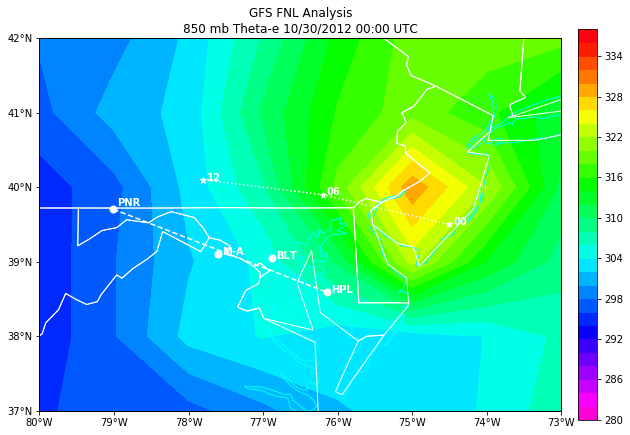

In [3]:
def read_FNL(ncf):
    nc_fid = Dataset(ncf, 'r')
    T = nc_fid.variables["TMP_P0_L100_GLL0"][:]  # shape lat, lon as shown above
    RH = nc_fid.variables["RH_P0_L100_GLL0"][:]
    Z = nc_fid.variables["HGT_P0_L100_GLL0"][:]
    VV = nc_fid.variables["VVEL_P0_L100_GLL0"][:]
    lat = nc_fid.variables['lat_0'][:]  # extract/copy the data
    lon = nc_fid.variables['lon_0'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return T, RH, Z, VV, lat, lon, names

FNL_file = 'fnl_20121030_00_00.grib2.nc'
names = read_FNL(FNL_file)
T, RH, Z, VV, lat, lon, names = read_FNL(FNL_file)
#print(names)
print('lat shape, lon shape', lat.shape, lon.shape,lat,lon)


#Plot theta-e map at a single pressure level

#print('T shape', T.shape)
#SLP = SLP[49:55,279:287]
T1000 = T[25,:,:]
RH1000 = RH[20,:,:]
Z1000 = Z[25,:,:]
Z1000km = Z1000/1000
Z1000km_md = Z1000km[51,283]
#print('Z1000km shape', Z1000km.shape, Z1000km)
print('Z1000km MD =', Z1000km_md)
TC1000 = T1000 - 273.15
#print('TC shape', TC1000.shape, TC1000)
#print('RH shape', RH1000.shape, RH1000)
lons,lats = np.meshgrid(lon,lat)
#print('lats shape, lons shape', lats.shape, lons.shape,lats,lons)

prlev = 1000
ThetaE_1000 = (273.15 + TC1000)*((1000/prlev)**0.286)+(3 * (RH1000 * (3.884266 * 10**
         ((7.5 * TC1000)/(237.7 + TC1000)))/100))
#print('ThetaE 1000mb shape', ThetaE_1000.shape, ThetaE_1000)
ThetaE_1000_md = ThetaE_1000[51,283]
print('ThetaE (K) 1000mb MD =', ThetaE_1000_md)

T850 = T[20,:,:]
RH850 = RH[15,:,:]
Z850 = Z[20,:,:]
Z850km = Z850/1000
Z850km_md = Z850km[51,283]
#print('Z1000km shape', Z1000km.shape, Z1000km)
print('Z850km MD =', Z850km_md)
TC850 = T850 - 273.15
#print('TC shape', TC1000.shape, TC1000)
#print('RH shape', RH1000.shape, RH1000)
lons,lats = np.meshgrid(lon,lat)
#print('lats shape, lons shape', lats.shape, lons.shape,lats,lons)

prlev = 850
ThetaE_850 = (273.15 + TC850)*((1000/prlev)**0.286)+(3 * (RH850 * (3.884266 * 10**
         ((7.5 * TC850)/(237.7 + TC850)))/100))
#print('ThetaE 1000mb shape', ThetaE_1000.shape, ThetaE_1000)
ThetaE_850_md = ThetaE_850[51,283]
print('ThetaE (K) 850mb MD =', ThetaE_850_md)

T700 = T[17,:,:]
RH700 = RH[12,:,:]
Z700 = Z[17,:,:]
Z700km = Z700/1000
Z700km_md = Z700km[51,283]
print('Z700km MD =', Z700km_md)
#print('Z700km shape', Z700km.shape, Z700km)
TC700 = T700 - 273.15
#print('TC shape', TC700.shape, TC700)
#print('RH shape', RH700.shape, RH700)
prlev = 700
ThetaE_700 = (273.15 + TC700)*((1000/prlev)**0.286)+(3 * (RH700 * (3.884266 * 10**
         ((7.5 * TC700)/(237.7 + TC700)))/100))
#print('ThetaE 700mb shape', ThetaE_700.shape, ThetaE_700)
ThetaE_700_md = ThetaE_700[51,283]
print('ThetaE (K) 700mb MD =', ThetaE_700_md)

Delta_TE_md = ThetaE_1000_md - ThetaE_700_md
print('Delta TE (K) MD =', Delta_TE_md)
Delta_Z_md = Z700km_md - Z1000km_md 
print('Delta Z (km) MD =', Delta_Z_md)
gamma_TE_md = Delta_TE_md/Delta_Z_md
print('Gamma TE (-K/Km) MD =', gamma_TE_md)

gamma_TE = (ThetaE_1000 - ThetaE_700)/(Z700km - Z1000km)
#print('ThetaE LR', gamma_TE.shape, gamma_TE)

fig = plt.figure(figsize=(10, 10))
img_extent = (-80, -73, 37, 42)
ax = plt.axes(projection=ccrs.PlateCarree(globe=None))
ax.set_extent([-80, -73, 37, 42], ccrs.PlateCarree(globe=None))

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                         category='cultural', name=shapename)
plt.title('GFS FNL Analysis\n'
          '850 mb Theta-e 10/30/2012 00:00 UTC')
levels = np.arange(280,340,2)
mi = ax.contourf(lons, lats, ThetaE_850, levels, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='gist_rainbow_r')
#mi = ax.contourf(lons, lats, ThetaE_850, extent=img_extent, transform=ccrs.PlateCarree(globe=None), cmap='gist_rainbow_r')
ax.coastlines(resolution='50m', color='cyan', linewidth=1)
for state in shpreader.Reader(states_shp).geometries():
    # pick a default color for the land with a black outline,
    facecolor = ''
    edgecolor = 'white'
    ax.add_geometries([state], ccrs.PlateCarree(),
                          facecolor=facecolor, edgecolor=edgecolor)
    
ax.set_xticks([-80,-79,-78,-77,-76,-75,-74,-73])
ax.set_yticks([37,38,39,40,41,42])   

ax.plot(-79.0121, 39.7057, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-78.96, 39.75, 'PNR', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-76.8785, 39.0554, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.82, 39.04, 'BLT', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-76.14, 38.59, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.09, 38.58, 'HPL', color='white', weight='bold', transform=ccrs.Geodetic())
ax.plot(-77.6, 39.1, 'wo', markersize=7, transform=ccrs.Geodetic())
ax.text(-77.55, 39.09, 'M-A', color='white', weight='bold', transform=ccrs.Geodetic())  

ax.plot(-74.5, 39.5, 'w*', markersize=7, transform=ccrs.Geodetic())
ax.text(-74.45, 39.49, '00', color='white', weight='bold', transform=ccrs.Geodetic())  
ax.plot(-76.2, 39.9, 'w*', markersize=7, transform=ccrs.Geodetic())
ax.text(-76.15, 39.89, '06', color='white', weight='bold', transform=ccrs.Geodetic())  
ax.plot(-77.8, 40.1, 'w*', markersize=7, transform=ccrs.Geodetic())
ax.text(-77.75, 40.09, '12', color='white', weight='bold', transform=ccrs.Geodetic())  

ax.plot([-79.0121,-76.14],[39.7057,38.59],color='white',linestyle='--',transform=ccrs.PlateCarree(),) 
ax.plot([-76.2,-74.5],[39.9,39.5],color='white',linestyle=':',transform=ccrs.PlateCarree(),)
ax.plot([-77.8,-76.2],[40.1,39.9],color='white',linestyle=':',transform=ccrs.PlateCarree(),)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(mi,fraction=0.035,pad=0.03)
plt.savefig("thetae_850_0000.png",dpi=250,bbox_inches='tight')
plt.show()

21
VV min, VV max = -3.807000 Pa/s 1.344000 Pa/s
Theta min, Theta max = 277.899994 K 410.929655 K


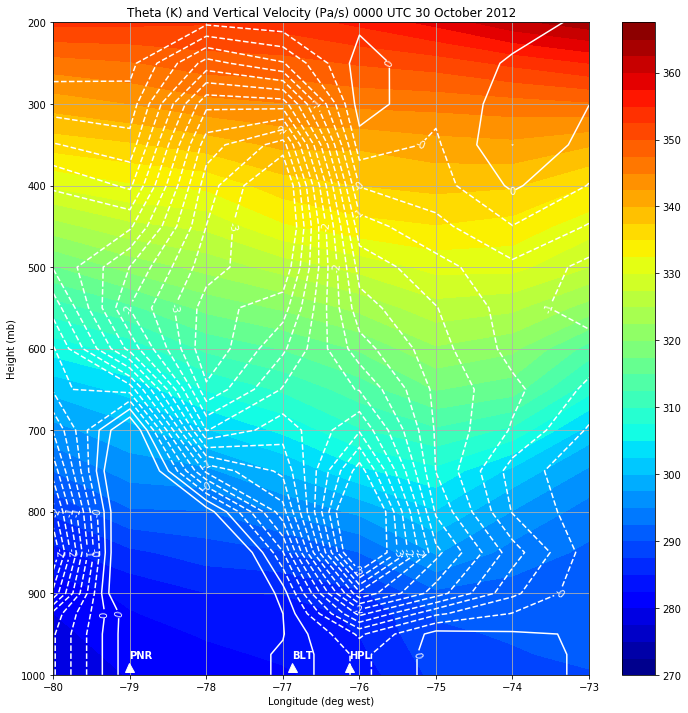

In [4]:
"""
Plot vertical theta cross section
"""
T, RH, Z, VV, lat, lon, names = read_FNL(FNL_file)
press = np.array([100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,925,950,975,1000])
print(len(press))
T = T[5:,:,:]
T = T[:,51,280:288]

VV = VV[:,51,280:288]
VV_min = np.amin(VV)
VV_max = np.amax(VV)
print("VV min, VV max = %f Pa/s %f Pa/s" % (VV_min, VV_max))

lons,lats = np.meshgrid(lon,lat)
lev = np.arange(0,21,1)
lon = lon[280:288]
lon = lon - 360
lons, prlevs = np.meshgrid(lon, press)

Theta = T*((1000/prlevs)**0.286)
TH_min = np.amin(Theta)
TH_max = np.amax(Theta)
print("Theta min, Theta max = %f K %f K" % (TH_min, TH_max))
levels_TH = np.arange(270,370,2.5)

levels_RH = np.array([86,88,90,92,94,96,98])
levels_VV = np.arange(-3.0,0.5,0.25)

fig = plt.figure(figsize=(12,12))
cf = plt.contourf(lons, prlevs, Theta, cmap=cm.jet, levels = levels_TH)
CS = plt.contour(lons, prlevs, VV, colors='w', levels = levels_VV)
plt.clabel(CS, inline=True, inline_spacing = 1, fontsize=10, fmt='%1.0f')
plt.xlim(-80,-73)
plt.ylim(1000,200)
plt.colorbar(cf)
plt.plot(-79.0121,990,'w^',markersize=9)
plt.text(-79.0121, 980, 'PNR', color='white', weight='bold')
plt.plot(-76.8785,990,'w^',markersize=9)
plt.text(-76.8785, 980, 'BLT', color='white', weight='bold')
plt.plot(-76.14,990,'w^',markersize=9)
plt.text(-76.14, 980, 'HPL', color='white', weight='bold')
plt.xlabel("Longitude (deg west)")
plt.ylabel("Height (mb)")
plt.title("Theta (K) and Vertical Velocity (Pa/s) 0000 UTC 30 October 2012")
plt.savefig("thta_crosssctn_0000.png",dpi=250,bbox_inches='tight')
plt.grid(True)
plt.show()

21
VV min, VV max = -3.807000 Pa/s 1.344000 Pa/s


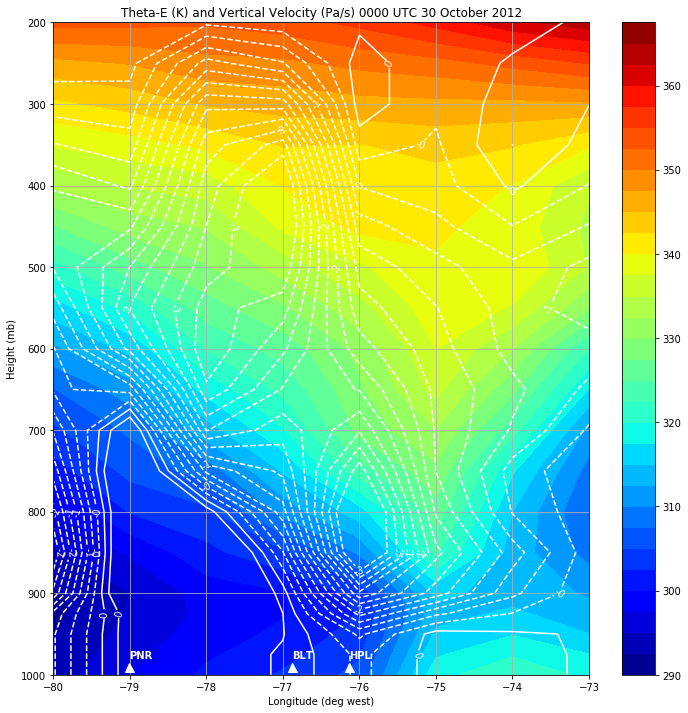

In [5]:
"""
Plot vertical theta-e cross section
"""
T, RH, Z, VV, lat, lon, names = read_FNL(FNL_file)
press = np.array([100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,925,950,975,1000])
print(len(press))
T = T[5:,:,:]
T = T[:,51,280:288]
RH = RH[:,51,280:288]

VV = VV[:,51,280:288]
VV_min = np.amin(VV)
VV_max = np.amax(VV)
print("VV min, VV max = %f Pa/s %f Pa/s" % (VV_min, VV_max))

TC = T - 273.15
lons,lats = np.meshgrid(lon,lat)
lev = np.arange(0,21,1)
lon = lon[280:288]
lon = lon - 360
lons, prlevs = np.meshgrid(lon, press)

ThetaE = (273.15 + TC)*((1000/prlevs)**0.286)+(3 * (RH * (3.884266 * 10**
         ((7.5 * TC)/(237.7 + TC)))/100))

levels_TE = np.arange(290,370,2.5)
levels_RH = np.array([86,88,90,92,94,96,98])
levels_VV = np.arange(-3.0,0.5,0.25)

fig = plt.figure(figsize=(12,12))
cf = plt.contourf(lons, prlevs, ThetaE, cmap=cm.jet, levels = levels_TE)
CS = plt.contour(lons, prlevs, VV, colors='w', levels = levels_VV)
plt.clabel(CS, inline=True, inline_spacing = 1, fontsize=10, fmt='%1.0f')
plt.xlim(-80,-73)
plt.ylim(1000,200)
plt.colorbar(cf)
plt.plot(-79.0121,990,'w^',markersize=9)
plt.text(-79.0121, 980, 'PNR', color='white', weight='bold')
plt.plot(-76.8785,990,'w^',markersize=9)
plt.text(-76.8785, 980, 'BLT', color='white', weight='bold')
plt.plot(-76.14,990,'w^',markersize=9)
plt.text(-76.14, 980, 'HPL', color='white', weight='bold')
plt.xlabel("Longitude (deg west)")
plt.ylabel("Height (mb)")
plt.title("Theta-E (K) and Vertical Velocity (Pa/s) 0000 UTC 30 October 2012")
plt.savefig("thtae_crosssctn_0000.png",dpi=250,bbox_inches='tight')
plt.grid(True)
plt.show()

21
21 21 21 21 21 21
[213.2     214.6     222.90001 233.      241.7     248.5     254.6
 259.1     261.1     262.2     264.      266.4     269.30002 272.6
 271.4     271.6     273.1     274.6     276.1     277.4     278.80002] [213.40001 216.      222.3     233.40001 242.6     249.2     254.8
 259.9     263.30002 265.80002 267.5     268.5     269.9     271.6
 272.1     272.9     274.9     276.4     277.80002 279.1     280.5    ] [212.40001 217.      222.6     234.6     243.90001 250.8     256.30002
 261.1     265.2     268.2     270.5     272.      273.      273.5
 274.30002 275.6     276.5     277.4     278.6     280.      281.30002] [210.7     218.3     223.2     234.8     244.40001 252.2     258.80002
 264.30002 267.4     270.      272.30002 274.4     275.9     276.6
 277.1     276.6     276.6     277.80002 279.4     280.80002 282.2    ] [212.8     218.40001 224.      235.7     245.90001 252.40001 258.7
 263.6     266.      268.2     269.6     271.1     273.9     275.5
 276.      27

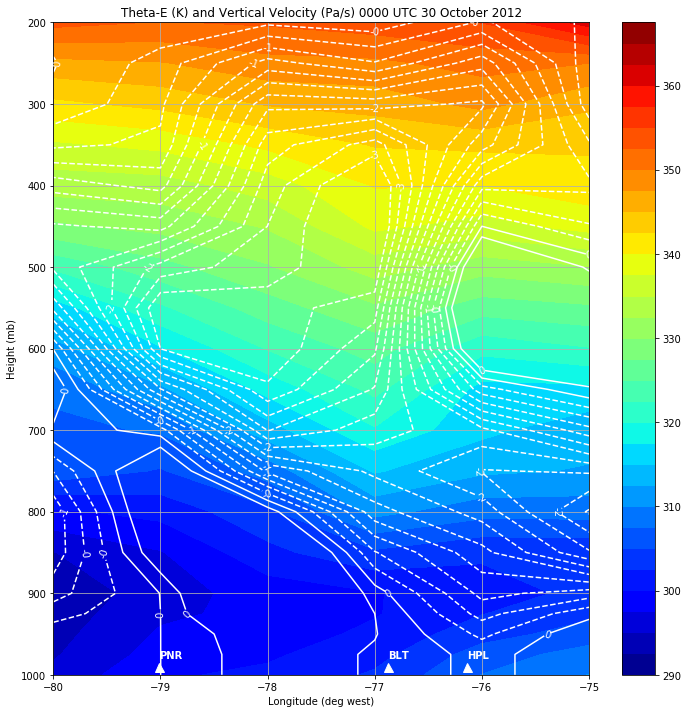

In [6]:
"""
Plot vertical theta-e cross section
"""
T, RH, Z, VV, lat, lon, names = read_FNL(FNL_file)
press = np.array([100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,925,950,975,1000])
print(len(press))

T_1,T_2,T_3,T_4,T_5,T_6 = T[5:,50,280],T[5:,50,281],T[5:,51,282],T[5:,51,283],T[5:,52,284],T[5:,52,285]
print(len(T_1),len(T_2),len(T_3),len(T_4),len(T_5),len(T_6))
print(T_1,T_2,T_3,T_4,T_5,T_6)
RH_1,RH_2,RH_3,RH_4,RH_5,RH_6 = RH[:,50,280],RH[:,50,281],RH[:,51,282],RH[:,51,283],RH[:,52,284],RH[:,52,285]
VV_1,VV_2,VV_3,VV_4,VV_5,VV_6 = VV[:,50,280],VV[:,50,281],VV[:,51,282],VV[:,51,283],VV[:,52,284],VV[:,52,285]

Tx = np.vstack((T_1,T_2,T_3,T_4,T_5,T_6))
print('Tx shape', Tx.shape,Tx)
Txrot = np.rot90(Tx,k=1,axes=(1,0))
print('Txrot shape', Txrot.shape,Txrot)
Tx = np.fliplr(Txrot)
print('Tx shape', Tx.shape,Tx)

RHx = np.vstack((RH_1,RH_2,RH_3,RH_4,RH_5,RH_6))
print('RHx shape', RHx.shape,RHx)
RHxrot = np.rot90(RHx,k=1,axes=(1,0))
print('RHxrot shape', RHxrot.shape,RHxrot)
RHx = np.fliplr(RHxrot)
print('RHx shape', RHx.shape,RHx)

VVx = np.vstack((VV_1,VV_2,VV_3,VV_4,VV_5,VV_6))
print('VVx shape', VVx.shape,VVx)
VVxrot = np.rot90(VVx,k=1,axes=(1,0))
print('VVxrot shape', VVxrot.shape,VVxrot)
VVx = np.fliplr(VVxrot)
print('VVx shape', VVx.shape,VVx)

VVx_min = np.amin(VVx)
VVx_max = np.amax(VVx)
print("VV min, VV max = %f Pa/s %f Pa/s" % (VVx_min, VVx_max))

TC = Tx - 273.15
lons,lats = np.meshgrid(lon,lat)
lev = np.arange(0,21,1)
lon = lon[280:286]
lon = lon - 360
lons, prlevs = np.meshgrid(lon, press)

ThetaE = (273.15 + TC)*((1000/prlevs)**0.286)+(3 * (RHx * (3.884266 * 10**
         ((7.5 * TC)/(237.7 + TC)))/100))

levels_TE = np.arange(290,370,2.5)
levels_RH = np.array([86,88,90,92,94,96,98])
levels_VV = np.arange(-3.0,0.5,0.25)

fig = plt.figure(figsize=(12,12))
cf = plt.contourf(lons, prlevs, ThetaE, cmap=cm.jet, levels = levels_TE)
CS = plt.contour(lons, prlevs, VVx, colors='w', levels = levels_VV)
plt.clabel(CS, inline=True, inline_spacing = 1, fontsize=10, fmt='%1.0f')
plt.xlim(-80,-75)
plt.ylim(1000,200)
plt.colorbar(cf)
plt.plot(-79.0121,990,'w^',markersize=9)
plt.text(-79.0121, 980, 'PNR', color='white', weight='bold')
plt.plot(-76.8785,990,'w^',markersize=9)
plt.text(-76.8785, 980, 'BLT', color='white', weight='bold')
plt.plot(-76.14,990,'w^',markersize=9)
plt.text(-76.14, 980, 'HPL', color='white', weight='bold')
plt.xlabel("Longitude (deg west)")
plt.ylabel("Height (mb)")
plt.title("Theta-E (K) and Vertical Velocity (Pa/s) 0000 UTC 30 October 2012")
plt.savefig("thtae_crosssctn_0000_PNR-HPL.png",dpi=250,bbox_inches='tight')
plt.grid(True)
plt.show()